### 국회의원 현황 정보 수집, 분석, 저장, 시각화
* 국회의원의 이름, ID 추출
* 상세 페이지 정보 추출 및 json 파일로 저장
* 상세 정보 json -> DataFrame 으로 변환
* 시각화 (막대그래프, 히스토그램, 파이차트, 히트맵)
* DB 테이블로 저장

In [86]:
import json
import requests
from bs4 import BeautifulSoup
import re
from urllib.parse import urljoin
import pandas as pd
from datetime import date
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [41]:
url = 'https://www.assembly.go.kr/assm/memact/congressman/memCond/memCondListAjax.do'
req_param_dict = {
    'currentPage':1,
    'rowPerPage':500
}

res = requests.get(url, params=req_param_dict)
# print(res.status_code)

if res.ok:
    soup = BeautifulSoup(res.text, 'lxml')
    # print(len(soup.select('div.memberna_list dl dt a')))
    atag_list = soup.select('div.memberna_list dl dt a')
    # for atag in atag_list:
        # print(atag)

    mem_id_list = []
    for atag in atag_list:
        href = atag['href']
        # print(href)
        match = re.search(r'(\d+)', href)
        # print(match)
        if match:
            mem_id = match.group(0)
            # print(match.group(0))
            mem_id_list.append(mem_id)
    print(mem_id_list)

['9771230', '9771142', '9771174', '9771233', '9771283', '9770933', '9771116', '9771276', '9771168', '9771007', '9771109', '9771180', '9770931', '9771224', '9771165', '9770679', '9771108', '9770977', '9771259', '9770998', '9770927', '9771258', '9770712', '9771152', '9771164', '9771181', '9770719', '9770997', '9771136', '9770723', '9771120', '9771173', '9770941', '9770984', '9771285', '9771268', '9770725', '9770527', '9771024', '9771195', '9770985', '9771208', '9771089', '9771210', '9771220', '9771144', '9771169', '9771111', '9771225', '9770975', '9770981', '9770934', '9771249', '9771186', '9771147', '9771127', '9771214', '9771206', '9771171', '9771288', '9771023', '9771090', '9771009', '9771192', '9770982', '9770986', '9770741', '9771237', '9770742', '9770991', '9771223', '9771270', '9771216', '9771134', '9771228', '9770752', '9770753', '9770755', '9771141', '9771274', '9771091', '9771187', '9771204', '9771175', '9771159', '9770764', '9770911', '9771248', '9770767', '9770768', '9770770'

In [44]:
# 국회의원의 상세 페이지에서 상세 정보 추출 및 dict에 저장

mem_detail_list = []

for idx, member_id in enumerate(mem_id_list, 1):
    print(member_id)
    detail_url = f"https://www.assembly.go.kr/assm/memPop/memPopup.do?dept_cd={member_id}"
    print(idx, detail_url)
    res = requests.get(detail_url)

    if res.ok:
        soup = BeautifulSoup(res.text, 'lxml')

        # html 문서를 분석해보면 dl 태그 pro_detail 클래스 하위에 dt와 dd 태그가 번갈아 가면서 배치되어 있는데
        # dt는 키, dd는 값 형태로 표현된다. 이에 dt와 dd 값을 각각 리스트로 담아서 zip 함수를 통해 한번에 dict로
        # 담는다.

        mem_detail_dict = {}

        dt_list = []
        for dt_tag in soup.select('dl.pro_detail dt'):
            pattern = re.compile(f'[\n\r\t]')
            dt_txt = pattern.sub('', dt_tag.text.strip()).replace(" ","")
            dt_list.append(dt_txt)

        dd_list = []
        for dd_tag in soup.select('dl.pro_detail dd'):
            pattern = re.compile(f'[\n\r\t]')
            dd_txt = pattern.sub('', dd_tag.text.strip()).replace(" ","")
            dd_list.append(dd_txt)

        mem_detail_dict = dict(zip(dt_list, dd_list))

        # print(len(soup.select('div.profile')))
        for div_tag in soup.select('div.profile'):
            # print(div_tag)
            # print(div_tag.find('h4').text)
            mem_detail_dict['이름']=div_tag.find('h4').text

            img_tag = div_tag.select('img')
            if img_tag:
                mem_detail_dict['이미지'] = urljoin(detail_url, img_tag[0]['src'])

            mem_detail_dict['생년월일'] = div_tag.select_one('li:nth-of-type(4)').text
        # print(mem_detail_dict)

        mem_detail_list.append(mem_detail_dict)

print(len(mem_detail_list))
print('------ Scraping Done. ------')


9771230
1 https://www.assembly.go.kr/assm/memPop/memPopup.do?dept_cd=9771230
9771142
2 https://www.assembly.go.kr/assm/memPop/memPopup.do?dept_cd=9771142
9771174
3 https://www.assembly.go.kr/assm/memPop/memPopup.do?dept_cd=9771174
9771233
4 https://www.assembly.go.kr/assm/memPop/memPopup.do?dept_cd=9771233
9771283
5 https://www.assembly.go.kr/assm/memPop/memPopup.do?dept_cd=9771283
9770933
6 https://www.assembly.go.kr/assm/memPop/memPopup.do?dept_cd=9770933
9771116
7 https://www.assembly.go.kr/assm/memPop/memPopup.do?dept_cd=9771116
9771276
8 https://www.assembly.go.kr/assm/memPop/memPopup.do?dept_cd=9771276
9771168
9 https://www.assembly.go.kr/assm/memPop/memPopup.do?dept_cd=9771168
9771007
10 https://www.assembly.go.kr/assm/memPop/memPopup.do?dept_cd=9771007
9771109
11 https://www.assembly.go.kr/assm/memPop/memPopup.do?dept_cd=9771109
9771180
12 https://www.assembly.go.kr/assm/memPop/memPopup.do?dept_cd=9771180
9770931
13 https://www.assembly.go.kr/assm/memPop/memPopup.do?dept_cd=977

In [49]:
with open('data/member.json', 'w', encoding='utf-8') as file:
    json.dump(mem_detail_list, file)

In [50]:
mem_df = pd.read_json('data/member.json')
print(mem_df.shape)

(295, 16)


In [51]:
mem_df['정당'].value_counts()

더불어민주당    172
국민의힘      106
정의당         6
무소속         6
국민의당        3
기본소득당       1
시대전환        1
Name: 정당, dtype: int64

In [52]:
mem_df['선거구'].value_counts()

비례대표              47
경남창원시성산구           1
광주광산구갑             1
전남담양군함평군영광군장성군     1
강원원주시갑             1
                  ..
경남창원시의창구           1
충남천안시을             1
서울강북구을             1
부산남구을              1
서울양천구갑             1
Name: 선거구, Length: 249, dtype: int64

In [55]:
print(type(mem_df['당선횟수']))
print(type(mem_df['당선횟수']).str)

temp_str = mem_df['당선횟수'].str

mem_df['당선횟수2'] = temp_str[:2]

mem_df.loc[0:3, ['당선횟수', '당선횟수2']]

<class 'pandas.core.series.Series'>
<class 'pandas.core.strings.accessor.StringMethods'>


,당선횟수,당선횟수2
0,"재선(19대,21대)",재선
1,초선(21대),초선
2,초선(21대),초선
3,초선(21대),초선


In [56]:
mem_df['당선횟수2'].value_counts()

초선    149
재선     72
3선     42
4선     19
5선     12
6선      1
Name: 당선횟수2, dtype: int64

In [57]:
mem_df.loc[mem_df['당선횟수2'] == '6선']

,정당,선거구,소속위원회,당선횟수,사무실전화,사무실호실,홈페이지,이메일,보좌관,비서관,비서,"취미,특기",의원실안내,이름,이미지,생년월일,당선횟수2
91,무소속,대전서구갑,,"6선(16대,17대,18대,19대,20대,21대)",02-6788-6461,의원회관804호,,pbs2100@gmail.com,"박승규,송석근","김민숙,좌승택","이영해,조연길,최지연,임규보,이초롱",,,박병석,https://www.assembly.go.kr/photo/9770090.jpg,1952-01-25,6선


In [59]:
temp_str = mem_df['선거구'].str
mem_df['선거구2'] = temp_str[:2]
mem_df.loc[0:3, ['선거구', '선거구2']]

,선거구,선거구2
0,경남창원시성산구,경남
1,대구동구을,대구
2,경기안양시만안구,경기
3,경남진주시을,경남


In [60]:
mem_df['선거구2'].value_counts(normalize=True)

경기    0.196610
비례    0.159322
서울    0.159322
부산    0.061017
경남    0.054237
경북    0.044068
인천    0.044068
충남    0.037288
대구    0.037288
전북    0.033898
전남    0.033898
광주    0.027119
강원    0.027119
충북    0.023729
대전    0.023729
울산    0.020339
제주    0.010169
세종    0.006780
Name: 선거구2, dtype: float64

In [62]:
mem_df['생년월일'].head(3)

0    1960-06-04
1    1959-11-02
2    1963-05-27
Name: 생년월일, dtype: object

In [66]:
mem_df['year'] = pd.DatetimeIndex(mem_df['생년월일']).year
mem_df['month'] = pd.DatetimeIndex(mem_df['생년월일']).month
mem_df['day'] = pd.DatetimeIndex(mem_df['생년월일']).day

print(mem_df['year'].dtypes)

mem_df.loc[0:3, ['year', 'month','day']]

int64


,year,month,day
0,1960,6,4
1,1959,11,2
2,1963,5,27
3,1971,3,3


In [73]:
def calc_age(birth):
    today = date.today()
    # print(today)
    age = today.year - birth.year - ((today.month, today.day) < (birth.month, birth.day))
    return age

In [74]:
calc_age(date(1990,1,1))

32

In [75]:
# row 별 년,월,일 col 값으로 나이를 계산하고 그 값을 age_list에 추가

age_list = []
for idx, row in mem_df.iterrows():
    age = calc_age(date(row['year'],row['month'],row['day']))
    age_list.append(age)

print(len(age_list))
age_list[:10]

295


[61, 62, 58, 50, 60, 50, 43, 51, 57, 48]

In [78]:
# 나이 col에 추가
mem_df['나이'] = age_list
mem_df[['생년월일','나이']].head()

,생년월일,나이
0,1960-06-04,61
1,1959-11-02,62
2,1963-05-27,58
3,1971-03-03,50
4,1961-04-26,60


In [80]:
mem_df['나이'].describe()

count    295.000000
mean      56.667797
std        7.352968
min       29.000000
25%       54.000000
50%       58.000000
75%       61.000000
max       74.000000
Name: 나이, dtype: float64

In [81]:
mem_df.columns

Index(['정당', '선거구', '소속위원회', '당선횟수', '사무실전화', '사무실호실', '홈페이지', '이메일', '보좌관',
       '비서관', '비서', '취미,특기', '의원실안내', '이름', '이미지', '생년월일', '당선횟수2', '선거구2',
       'year', 'month', 'day', '나이'],
      dtype='object')

In [83]:
mem_df['이미지'].tail()

290    https://www.assembly.go.kr/photo/9771183.jpg
291    https://www.assembly.go.kr/photo/9771145.jpg
292    https://www.assembly.go.kr/photo/9771130.jpg
293    https://www.assembly.go.kr/photo/9771161.jpg
294    https://www.assembly.go.kr/photo/9770936.jpg
Name: 이미지, dtype: object

In [85]:
for img_url in mem_df['이미지'].sample(2):
    print(img_url)

https://www.assembly.go.kr/photo/9771241.jpg
https://www.assembly.go.kr/photo/9771174.jpg


In [88]:
%matplotlib inline
[(font.name, font.fname)for font in fm.fontManager.ttflist if 'Ma' in font.name]
plt.rcParams['font.family'] = 'Malgun Gothic'

<AxesSubplot:xlabel='당선횟수2', ylabel='count'>

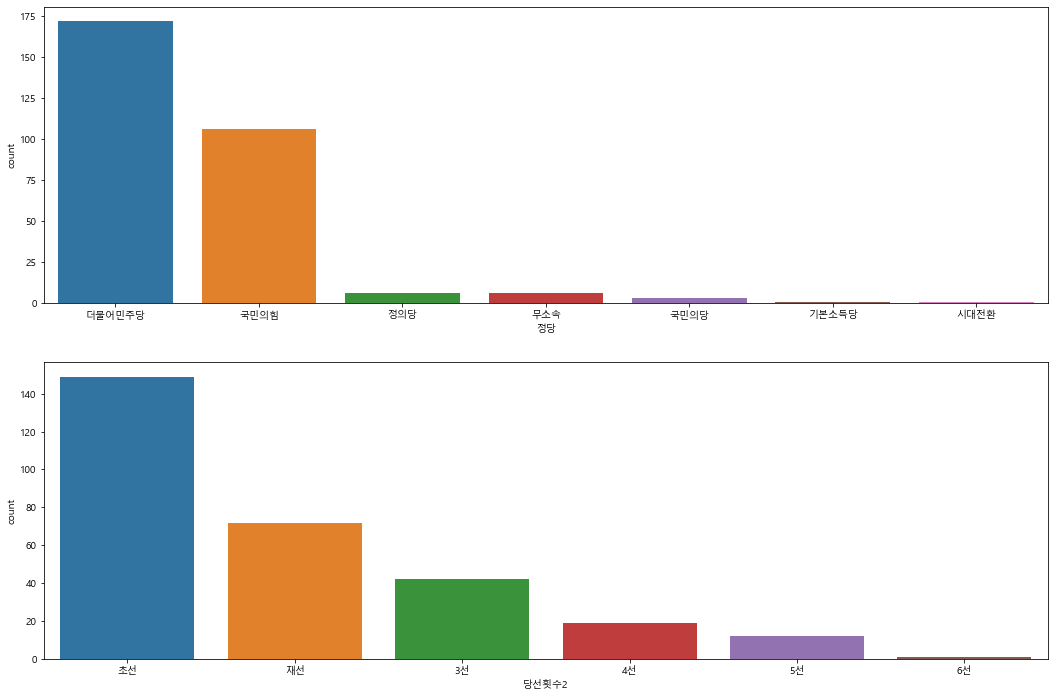

In [89]:
figure, (axes1, axes2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,12)

sns.countplot(data=mem_df, x='정당', ax=axes1, order=mem_df['정당'].value_counts().index)
sns.countplot(data=mem_df, x='당선횟수2', ax=axes2, order=mem_df['당선횟수2'].value_counts().index)